In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

In [2]:
plt.style.use("dstyle")
_ = plt.figure()
plt.style.use("dstyle")

<Figure size 432x288 with 0 Axes>

In [3]:
MPC_CGS     = 3.0857e24
KM_CGS      = 1.e5
GYRS_CGS    = 3.1536e16

H0_Concordance = 70.
H0_Planck2018 = 67.66
H0_Pantheon = 68.03
H0_Union3 = 66.53
H0_DESY5 = 67.24

H0_cgs_Concordance = H0_Concordance * (KM_CGS / MPC_CGS)
H0_cgs_Planck2018 = H0_Planck2018 * (KM_CGS / MPC_CGS)
H0_cgs_Pantheon = H0_Pantheon * (KM_CGS / MPC_CGS)
H0_cgs_Union3 = H0_Union3 * (KM_CGS / MPC_CGS)
H0_cgs_DESY5 = H0_DESY5 * (KM_CGS / MPC_CGS)

In [4]:
table_fname_Concordance = "noradiation/table_Concordance.txt"
table_fname_Planck2018 = "noradiation/table_Planck2018.txt"
table_fname_Pantheon = "noradiation/table_Pantheon.txt"
table_fname_Union3 = "noradiation/table_Union3.txt"
table_fname_DESY5 = "noradiation/table_DESY5.txt"

nskiprows = 10

table_Concordance = np.loadtxt(table_fname_Concordance, skiprows=nskiprows, delimiter = ',')
table_Planck2018 = np.loadtxt(table_fname_Planck2018, skiprows=nskiprows, delimiter = ',')
table_Pantheon = np.loadtxt(table_fname_Pantheon, skiprows=nskiprows, delimiter = ',')
table_Union3 = np.loadtxt(table_fname_Union3, skiprows=nskiprows, delimiter = ',')
table_DESY5 = np.loadtxt(table_fname_DESY5, skiprows=nskiprows, delimiter = ',')

In [5]:
z_arr = table_Concordance[:,0]
l_z_arr = table_Concordance[:,1]
a_arr = table_Concordance[:,2]

time_look_Concordance = table_Concordance[:,3]
time_age_Concordance = table_Concordance[:,4]
time_ageGyr_Concordance = time_age_Concordance / H0_cgs_Concordance / GYRS_CGS

time_look_Planck2018 = table_Planck2018[:,3]
time_age_Planck2018 = table_Planck2018[:,4]
time_ageGyr_Planck2018 = time_age_Planck2018 / H0_cgs_Planck2018 / GYRS_CGS

time_look_Pantheon = table_Pantheon[:,3]
time_age_Pantheon = table_Pantheon[:,4]
time_ageGyr_Pantheon = time_age_Pantheon / H0_cgs_Pantheon / GYRS_CGS

time_look_Union3 = table_Union3[:,3]
time_age_Union3 = table_Union3[:,4]
time_ageGyr_Union3 = time_age_Union3 / H0_cgs_Union3 / GYRS_CGS

time_look_DESY5 = table_DESY5[:,3]
time_age_DESY5 = table_DESY5[:,4]
time_ageGyr_DESY5 = time_age_DESY5 / H0_cgs_DESY5 / GYRS_CGS

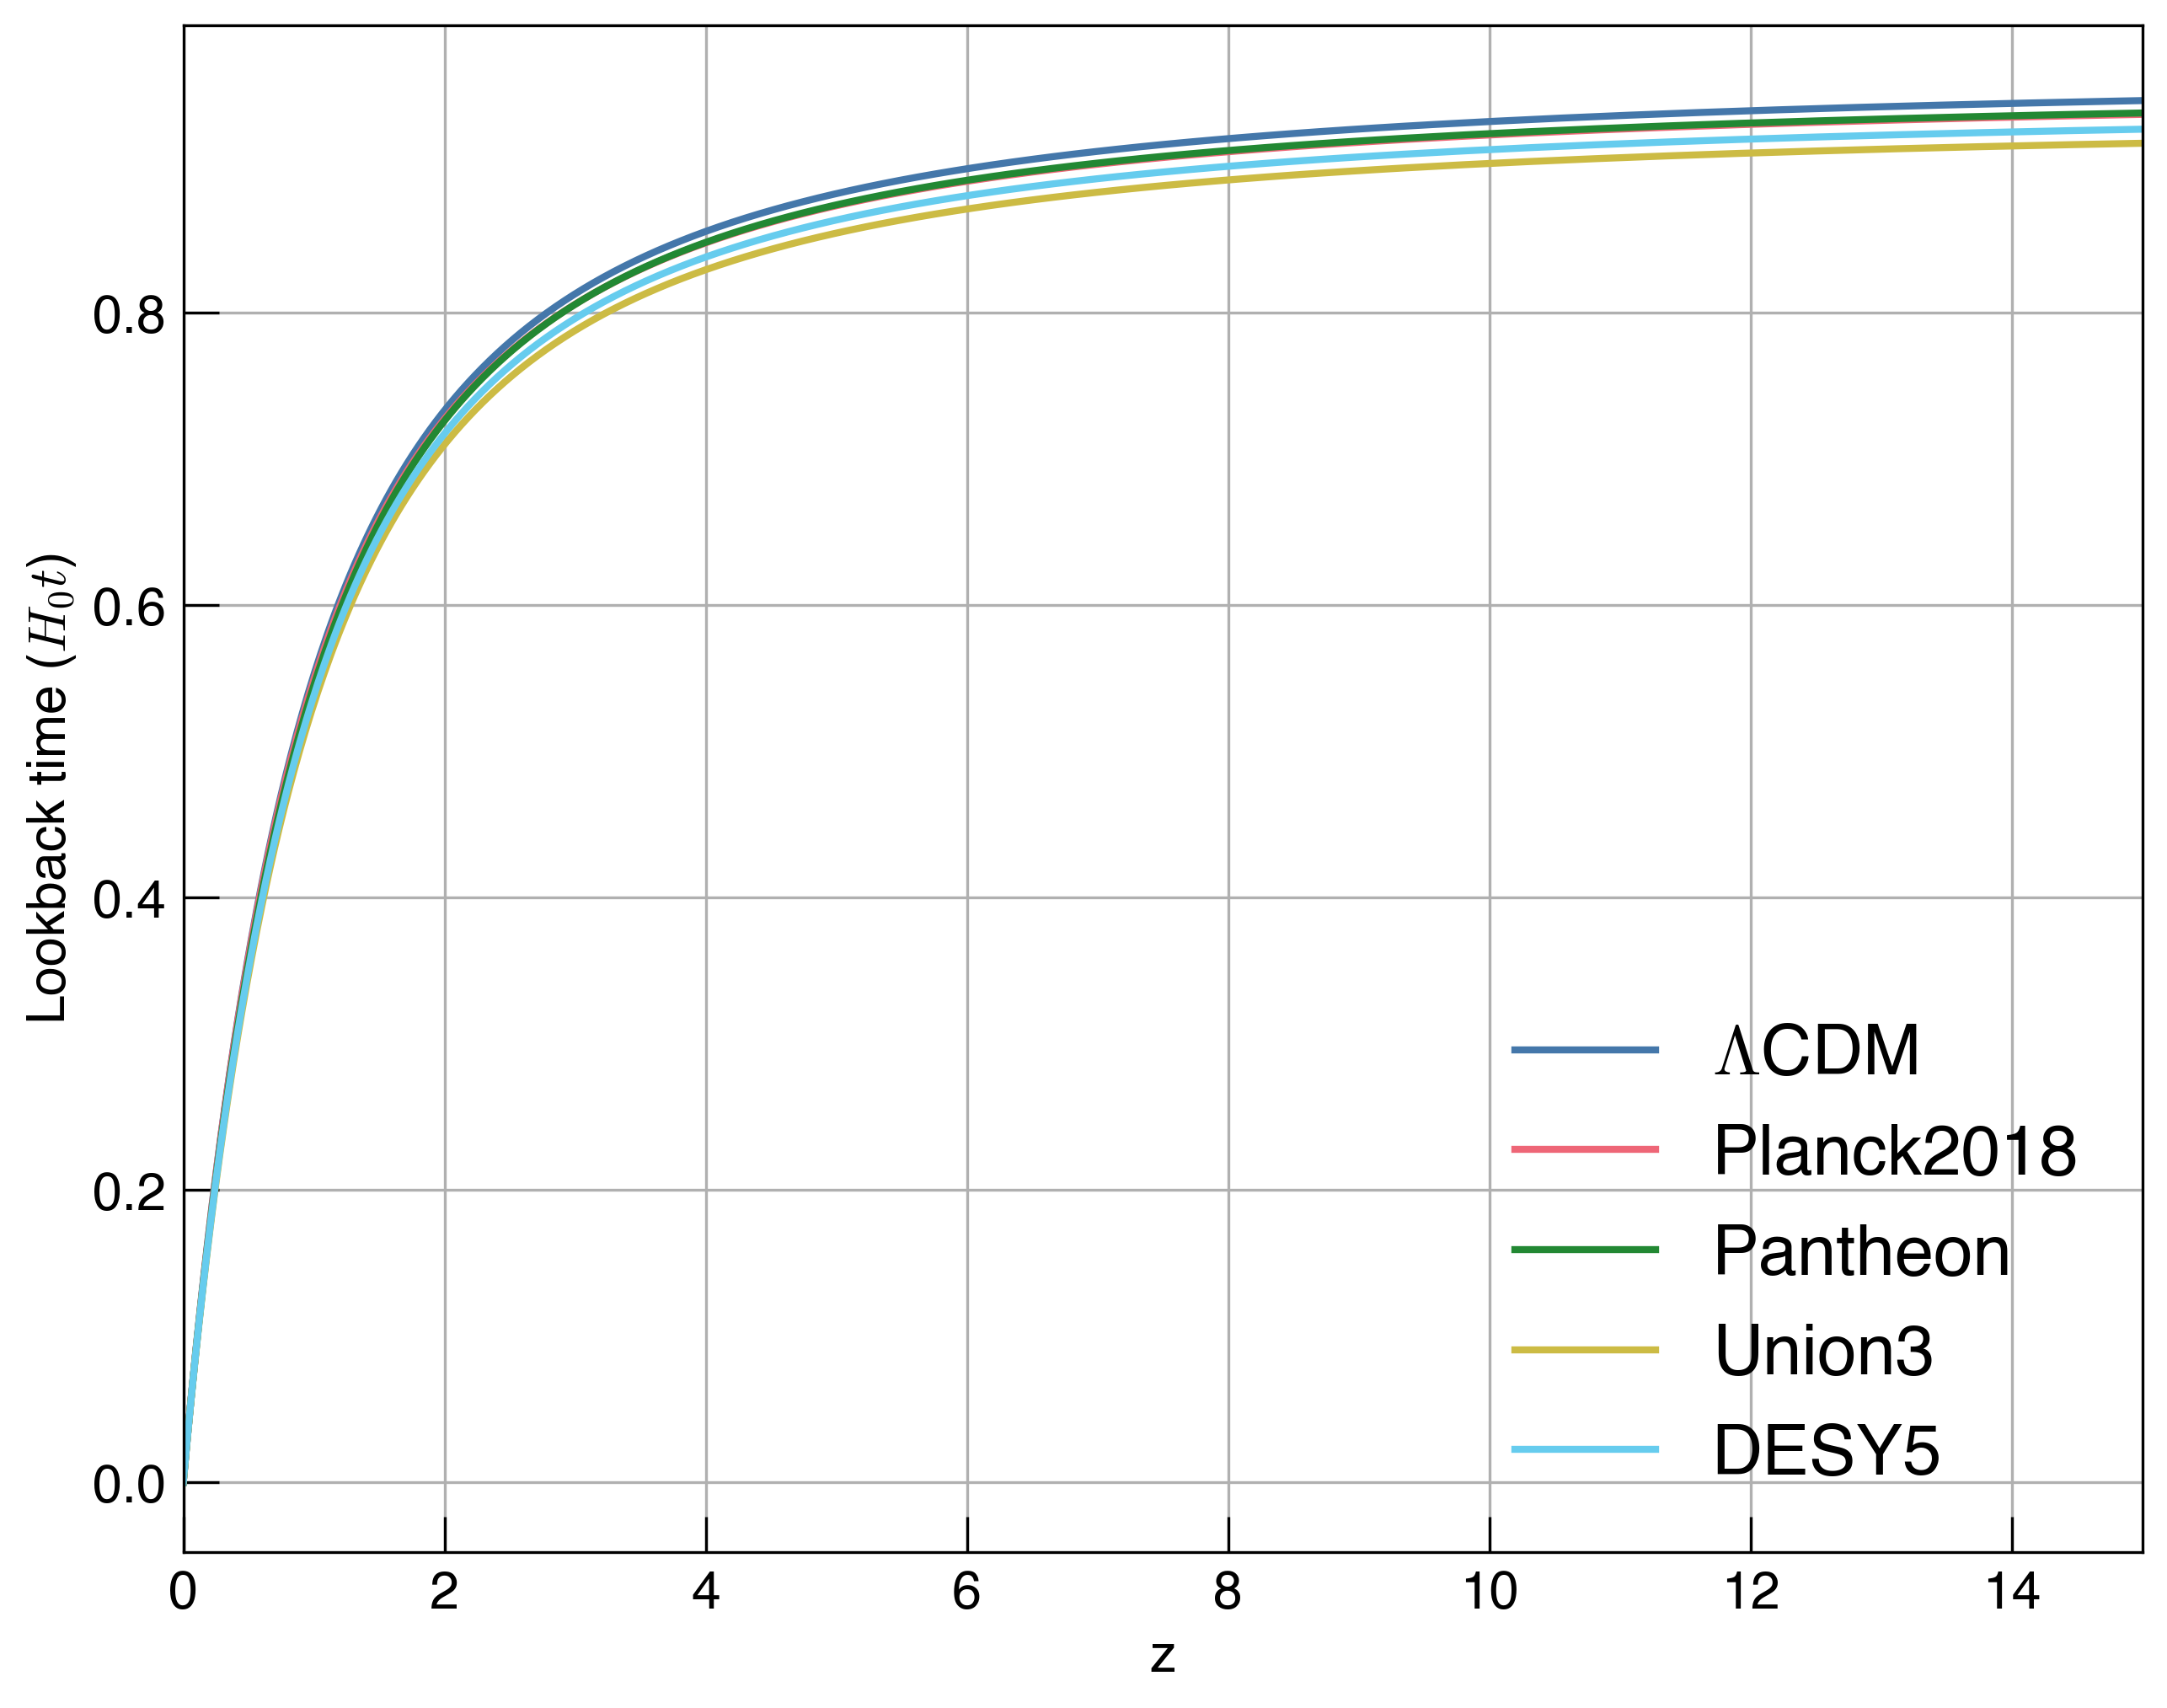

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(z_arr, time_look_Concordance, label=r'$\Lambda$CDM', lw=2)
ax.plot(z_arr, time_look_Planck2018, label='Planck2018', lw=2)
ax.plot(z_arr, time_look_Pantheon, label='Pantheon', lw=2)
ax.plot(z_arr, time_look_Union3, label='Union3', lw=2)
ax.plot(z_arr, time_look_DESY5, label='DESY5', lw=2)

ax.set_xlabel("z")
ax.set_ylabel(r"Lookback time ($H_0 t$)")

ax.grid()

ax.set_xlim(0,15)

plt.legend()

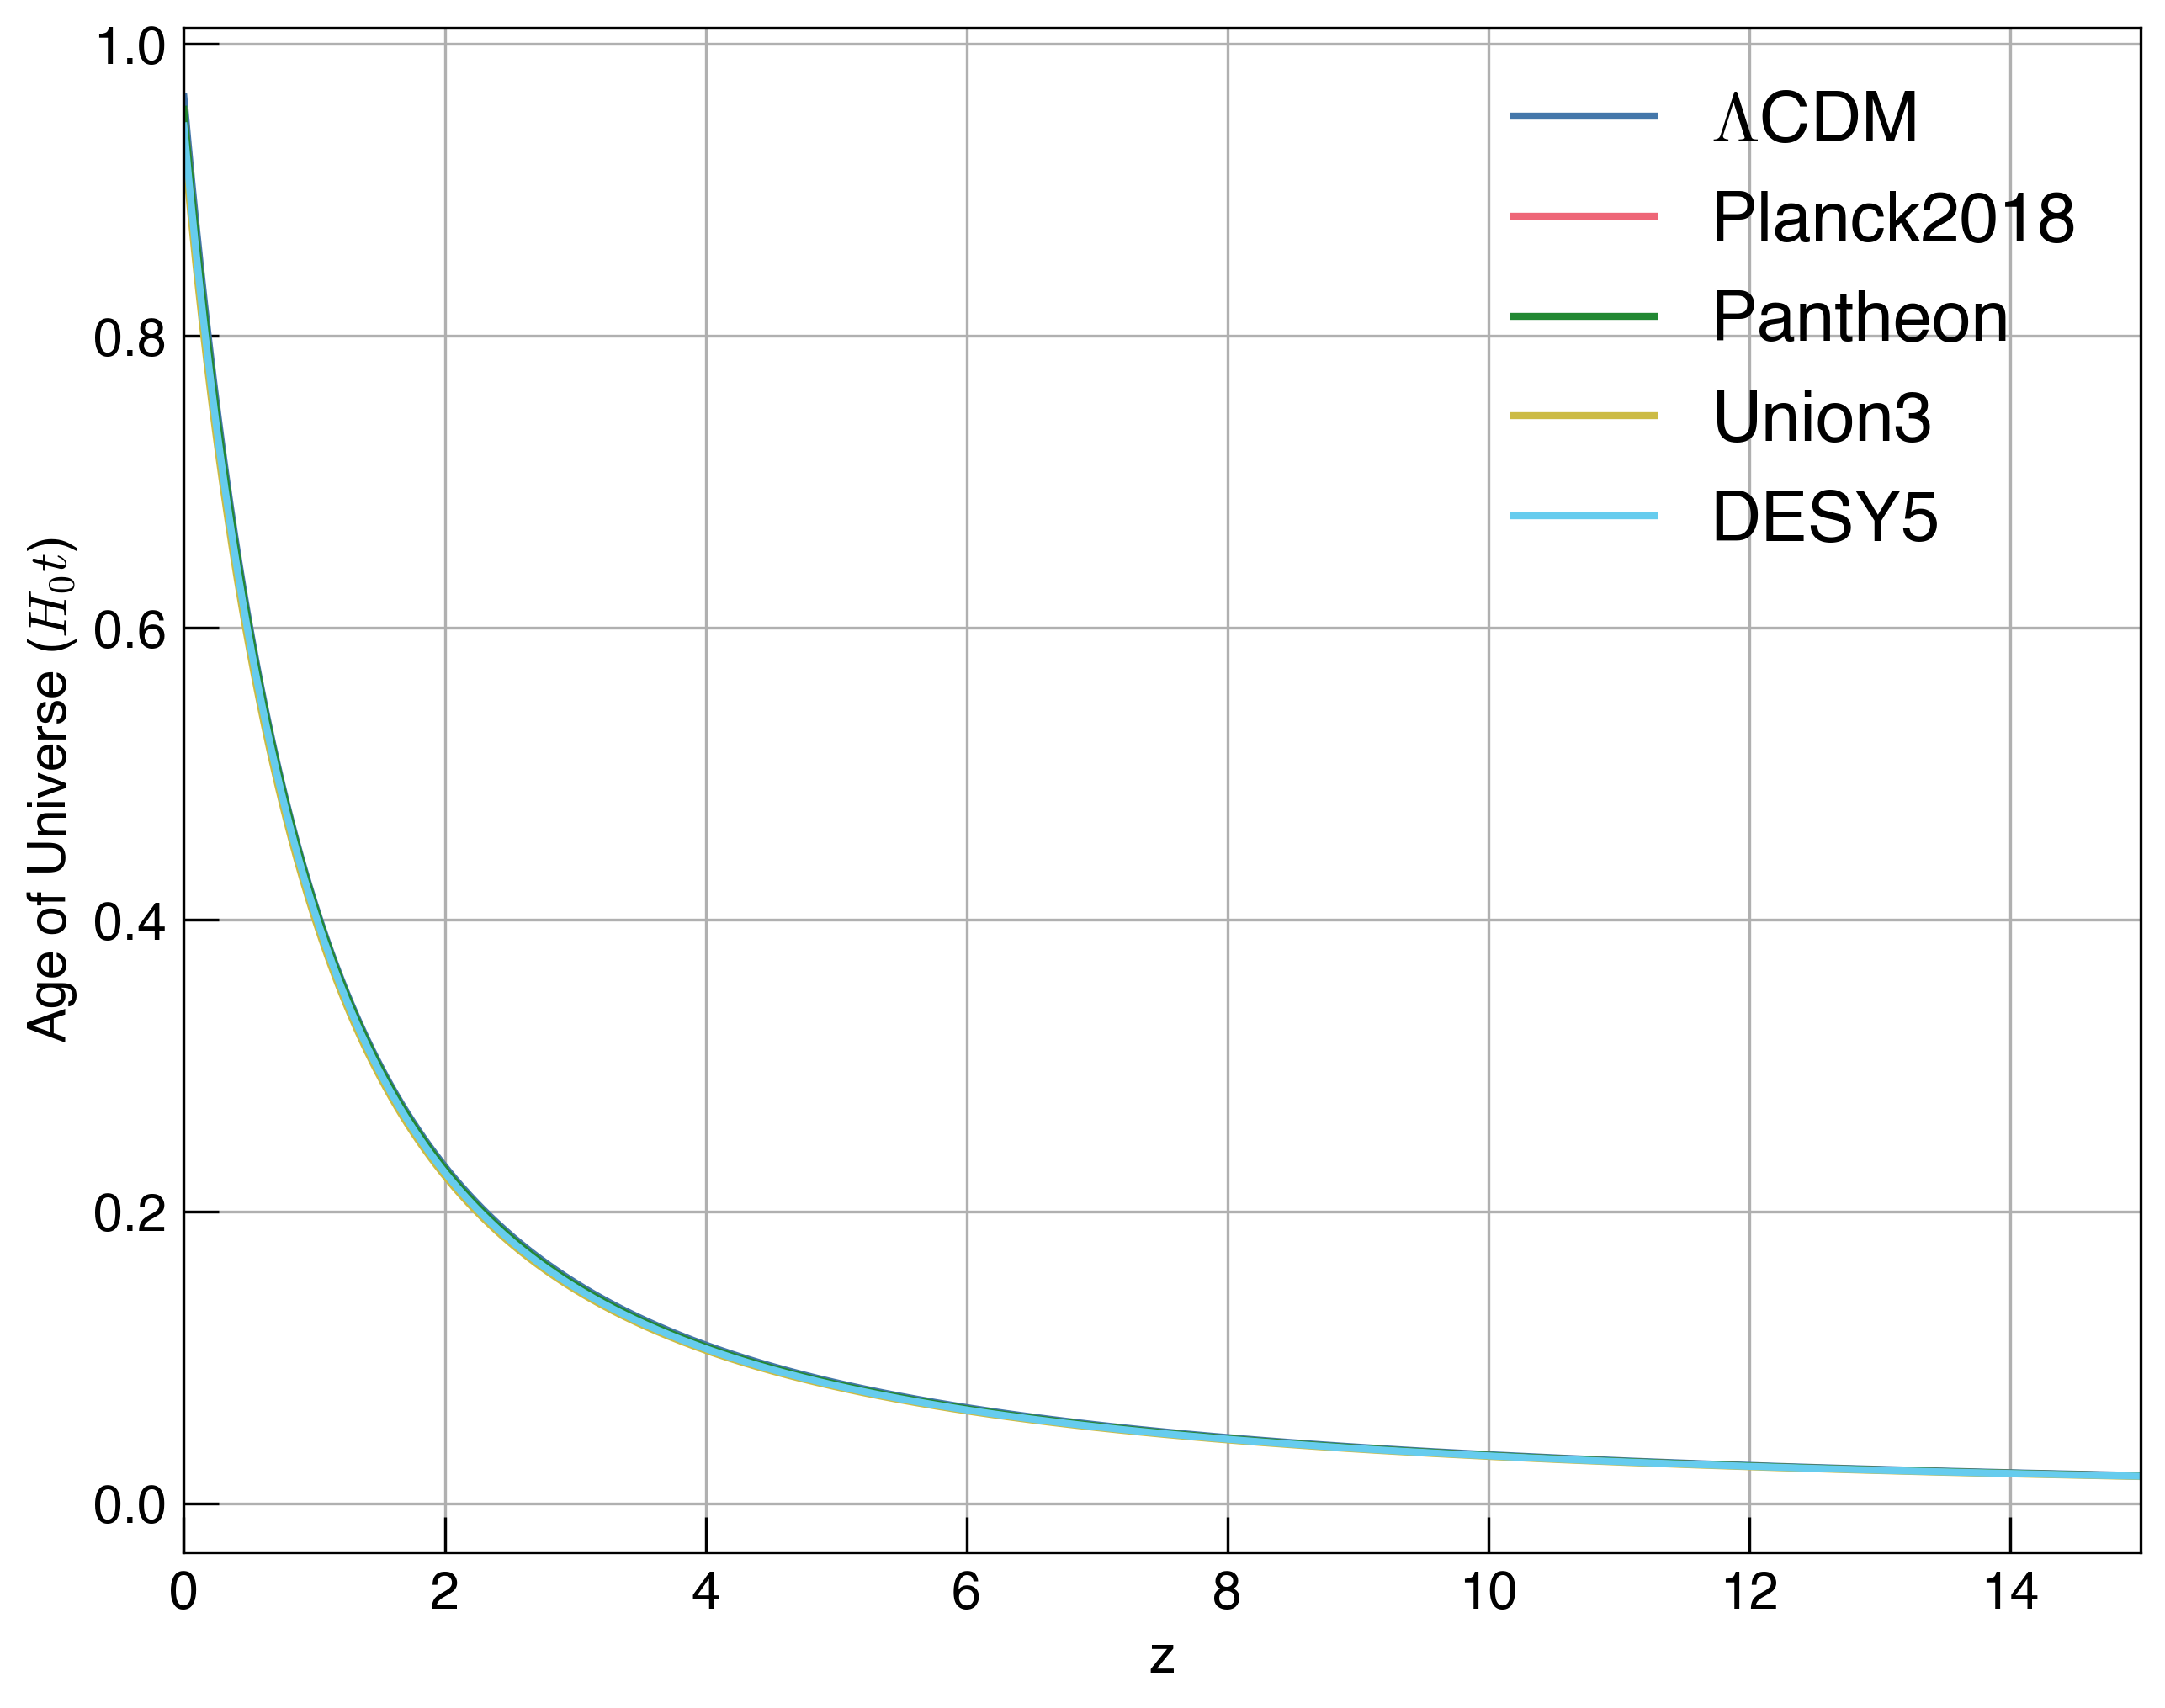

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(z_arr, time_age_Concordance, label=r'$\Lambda$CDM', lw=2)
ax.plot(z_arr, time_age_Planck2018, label='Planck2018', lw=2)
ax.plot(z_arr, time_age_Pantheon, label='Pantheon', lw=2)
ax.plot(z_arr, time_age_Union3, label='Union3', lw=2)
ax.plot(z_arr, time_age_DESY5, label='DESY5', lw=2)

ax.set_xlabel("z")
ax.set_ylabel(r"Age of Universe ($H_0 t$)")

ax.grid()

ax.set_xlim(0,15)

plt.legend()

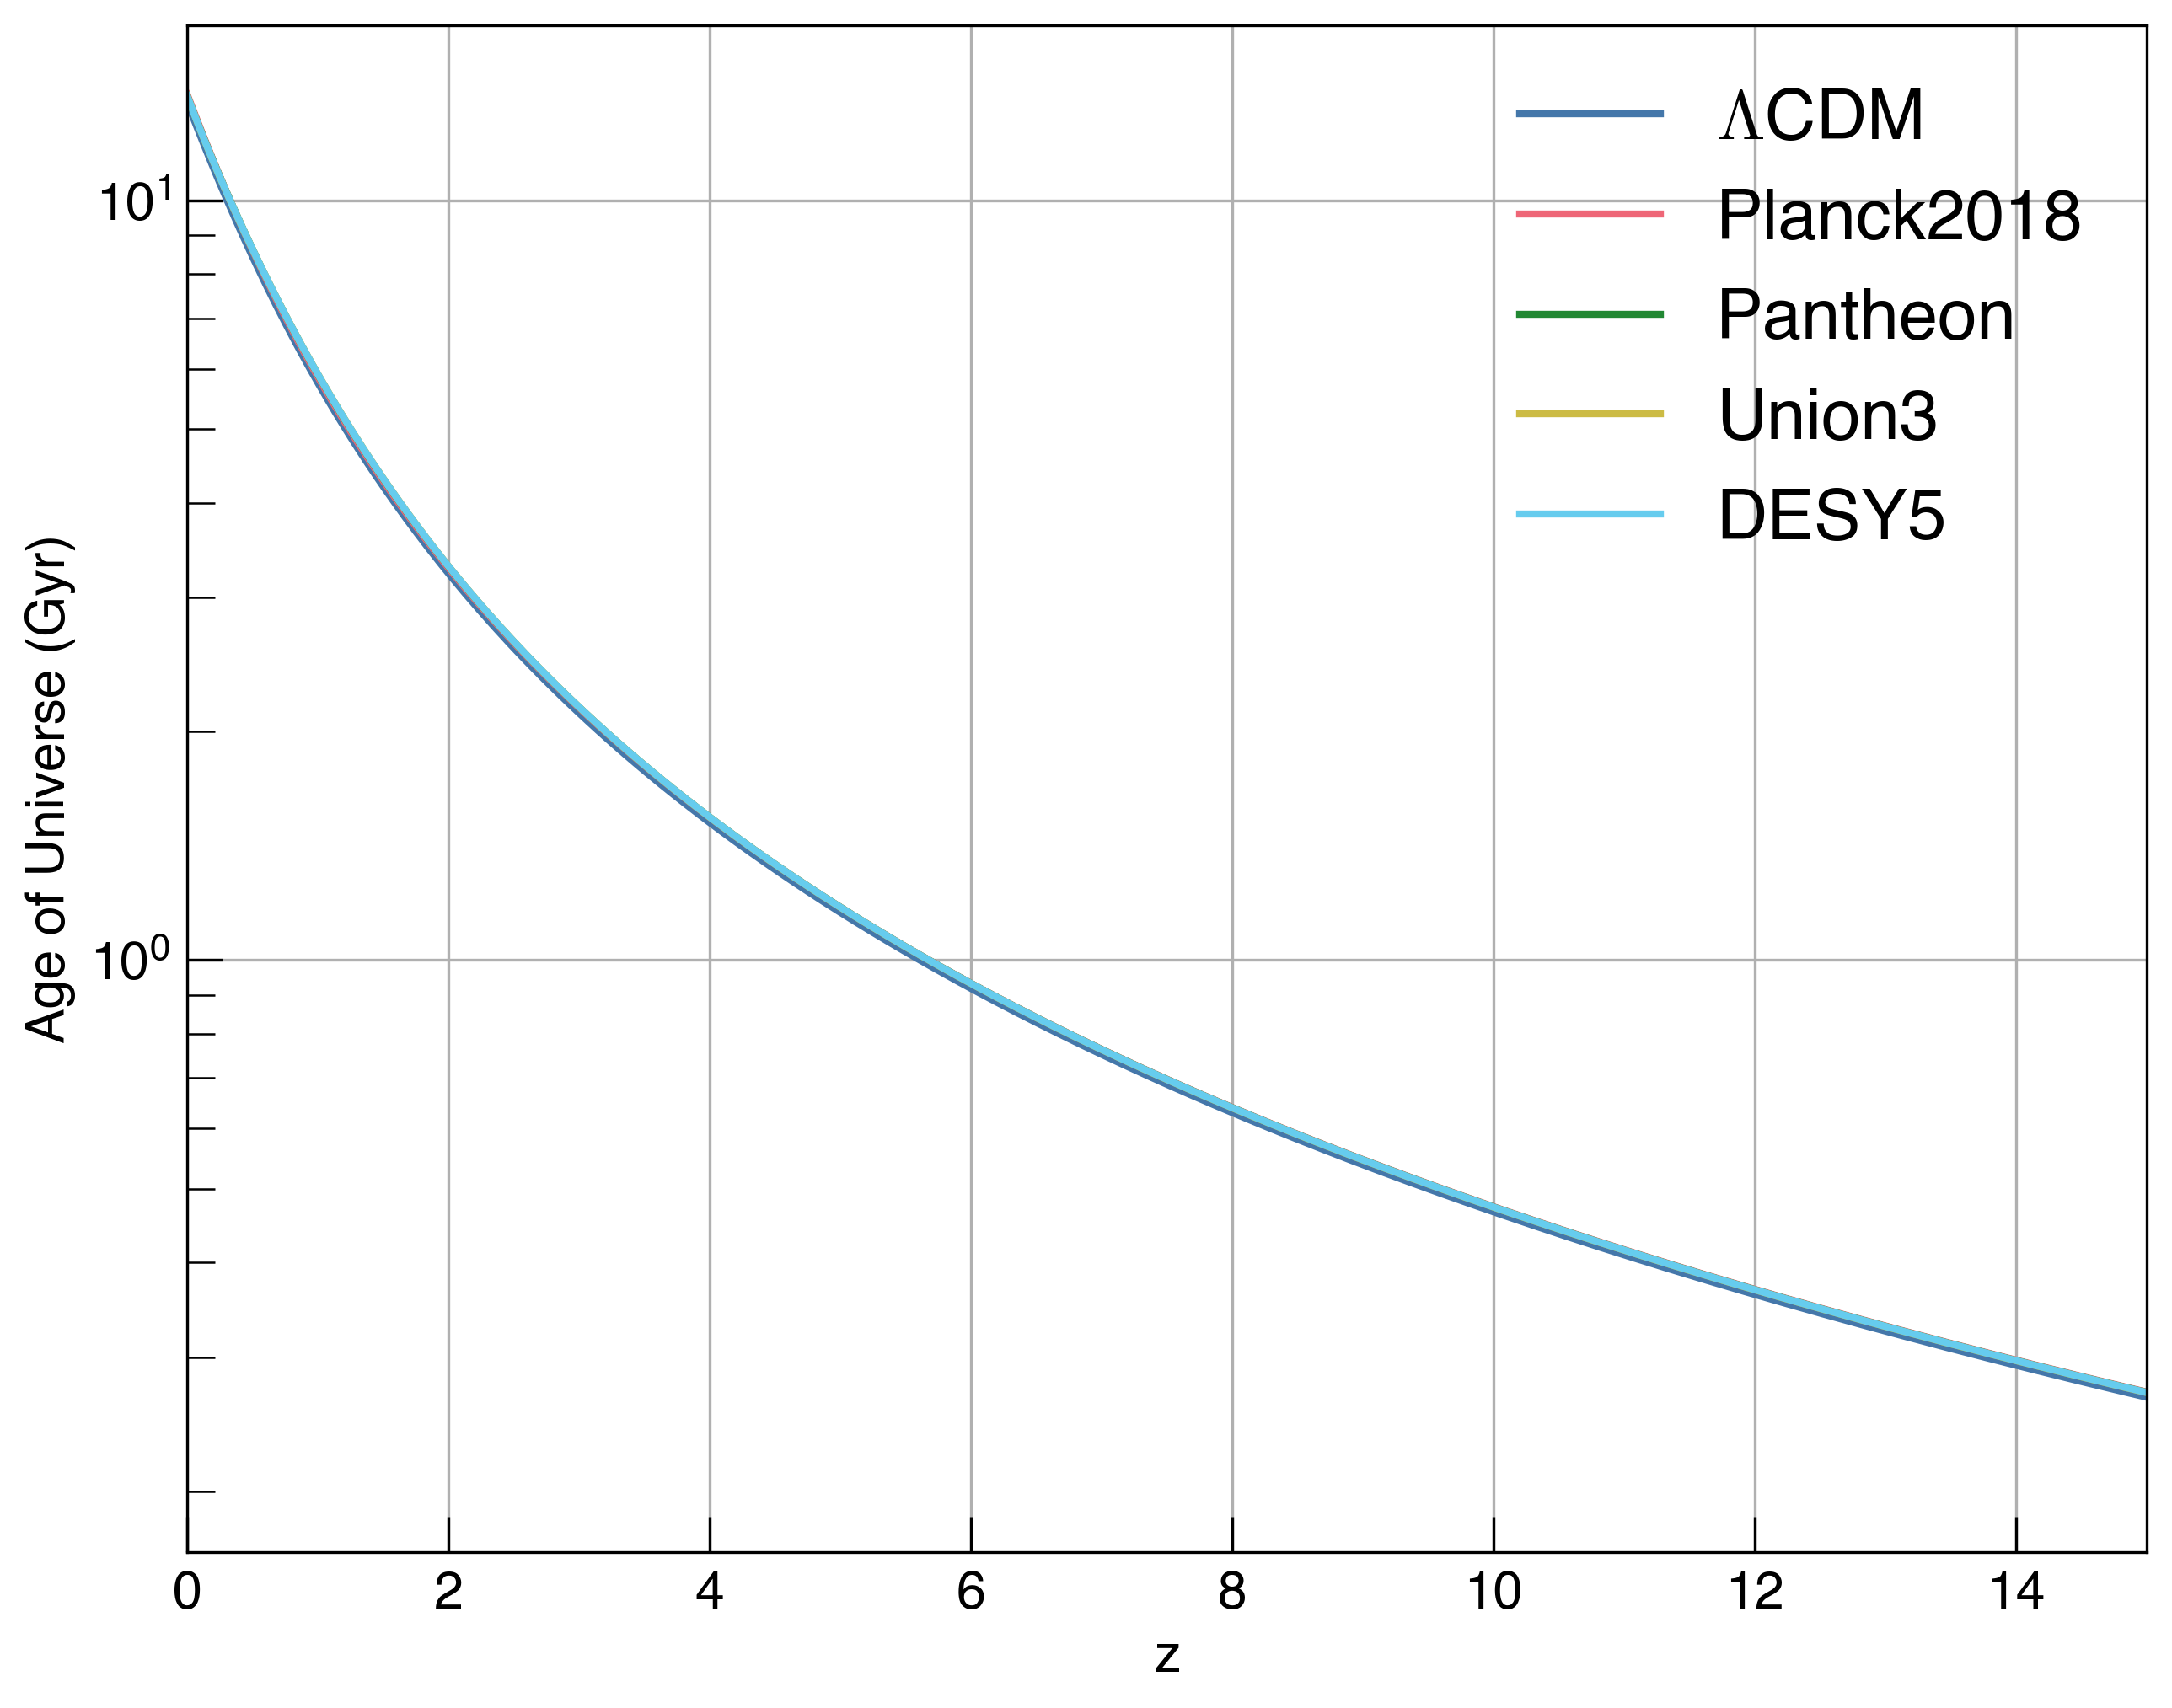

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(z_arr, time_ageGyr_Concordance, label=r'$\Lambda$CDM', lw=2)
ax.plot(z_arr, time_ageGyr_Planck2018, label='Planck2018', lw=2)
ax.plot(z_arr, time_ageGyr_Pantheon, label='Pantheon', lw=2)
ax.plot(z_arr, time_ageGyr_Union3, label='Union3', lw=2)
ax.plot(z_arr, time_ageGyr_DESY5, label='DESY5', lw=2)

ax.set_xlabel("z")
ax.set_ylabel(r"Age of Universe (Gyr)")

ax.set_yscale('log')

ax.grid()

ax.set_xlim(0,15)

plt.legend()

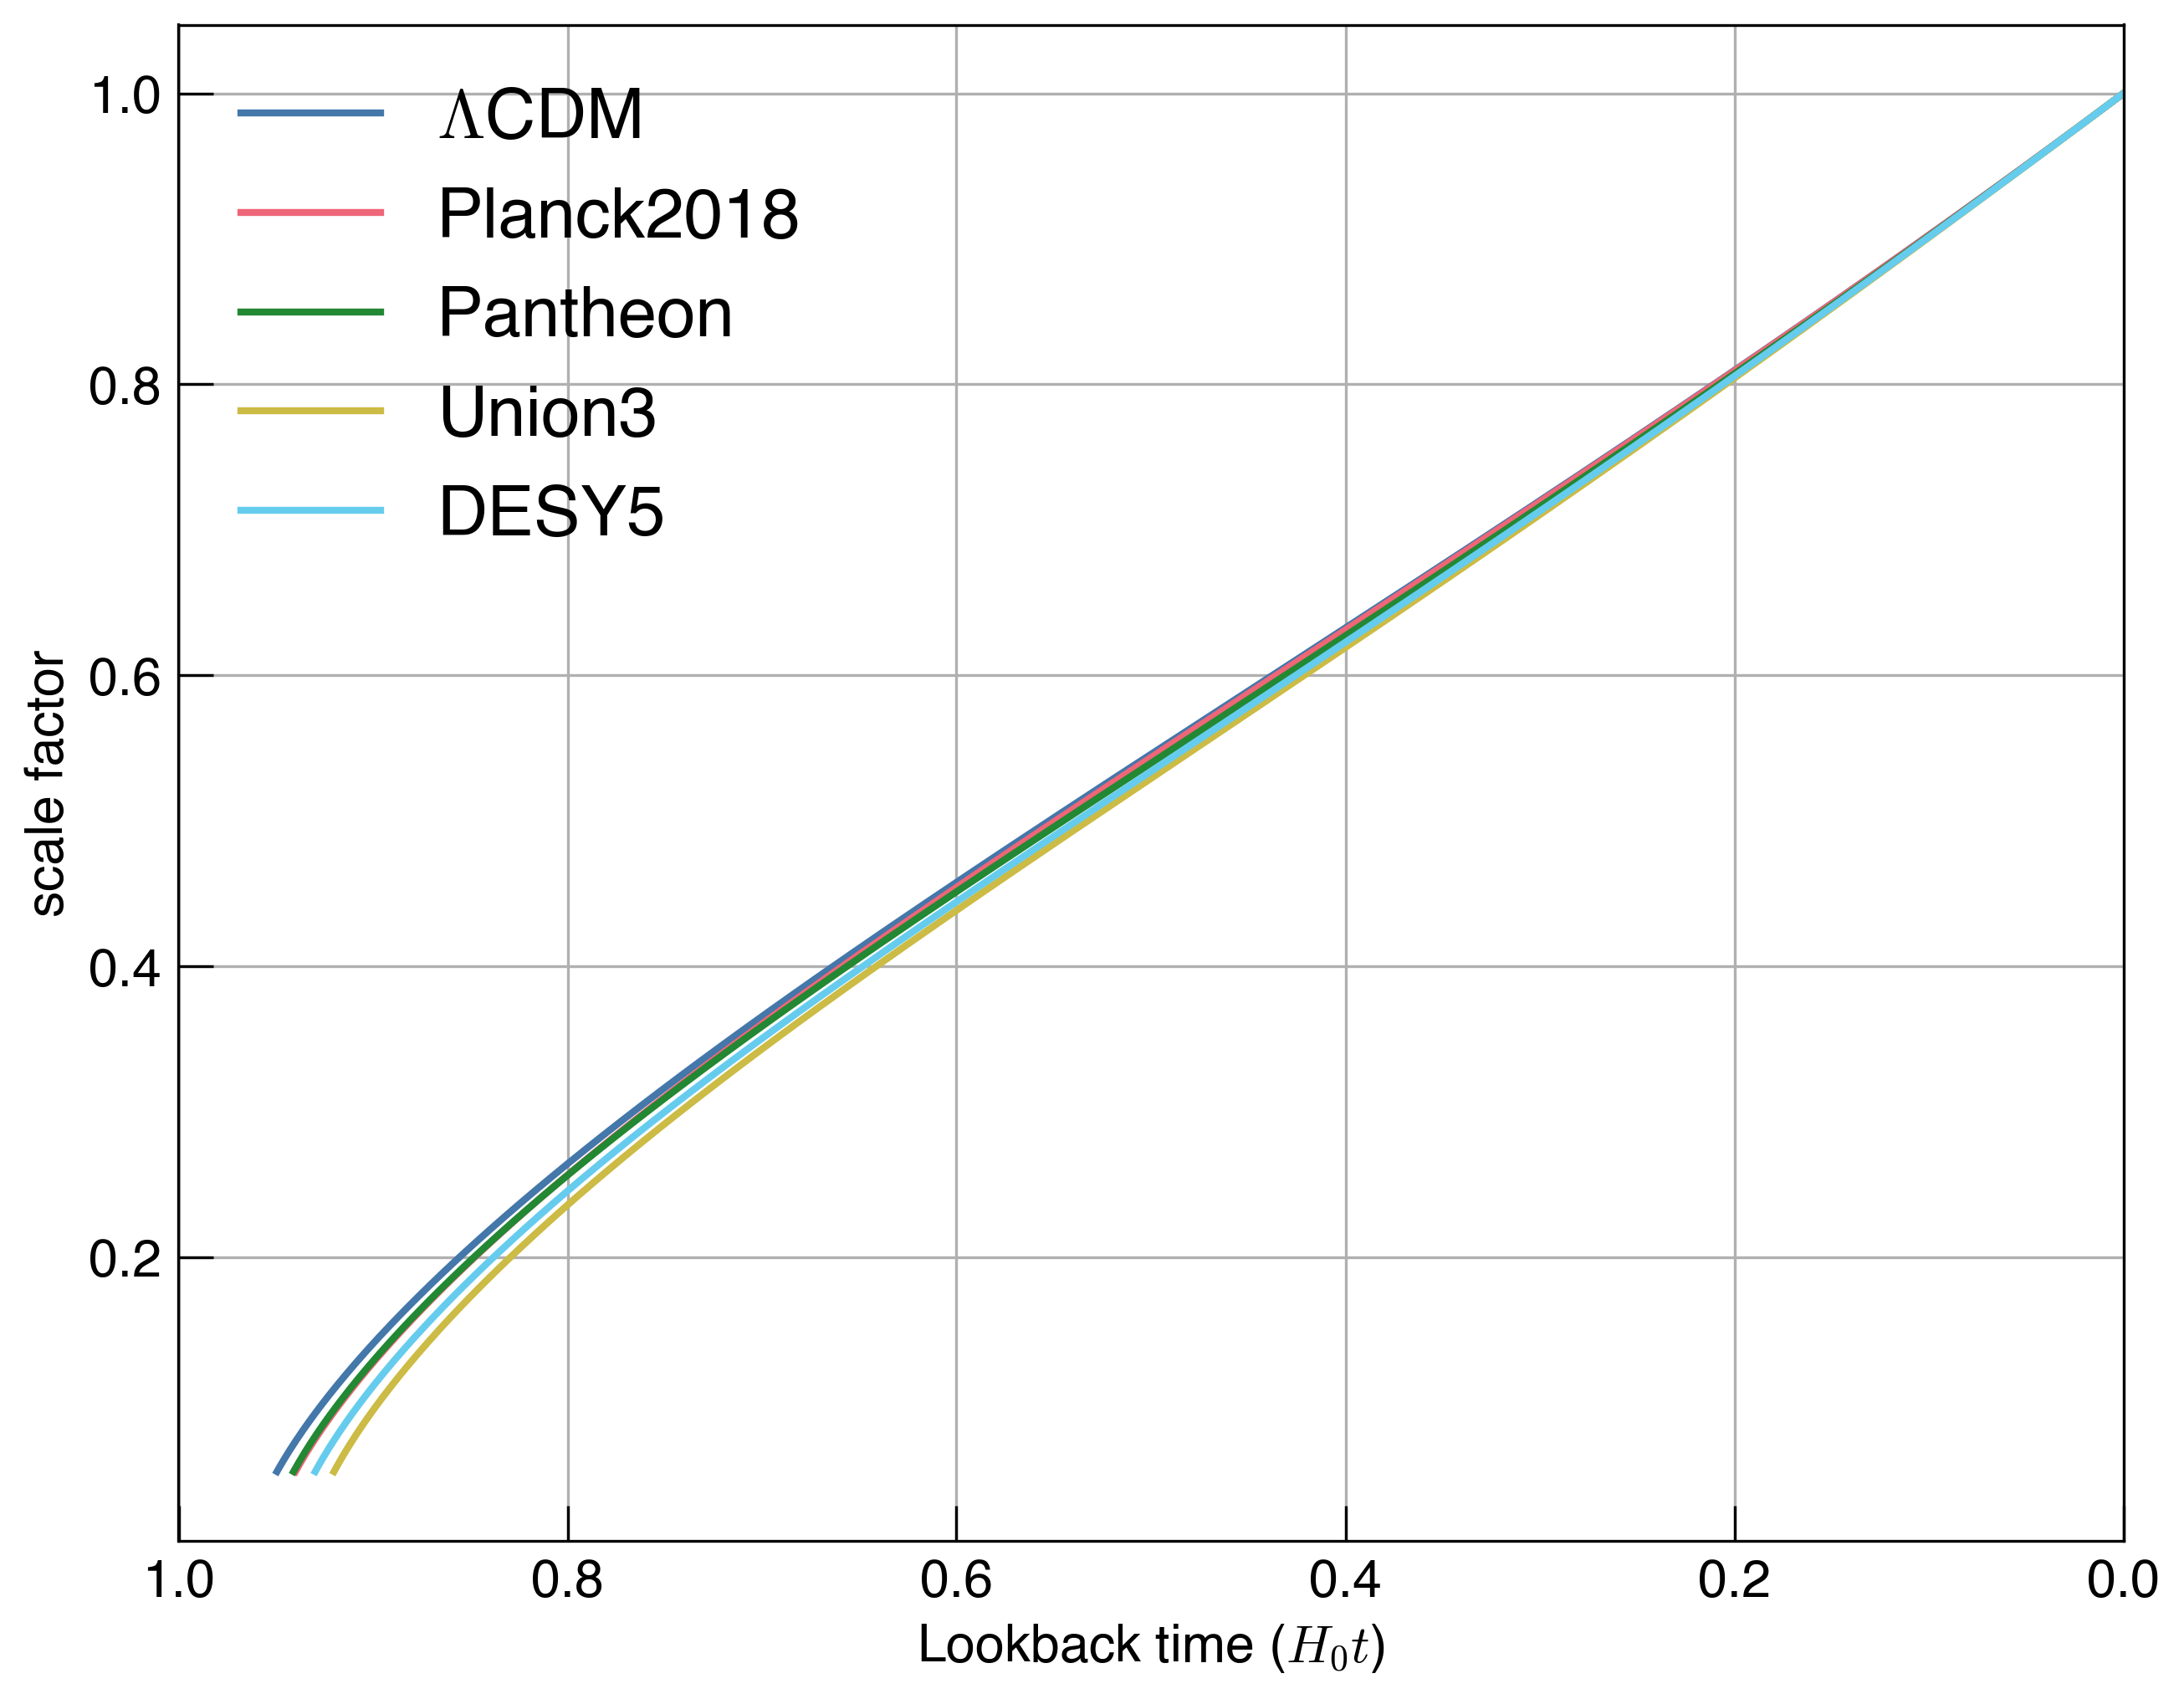

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(time_look_Concordance, a_arr, label=r'$\Lambda$CDM', lw=2)
ax.plot(time_look_Planck2018, a_arr, label='Planck2018', lw=2)
ax.plot(time_look_Pantheon, a_arr, label='Pantheon', lw=2)
ax.plot(time_look_Union3, a_arr, label='Union3', lw=2)
ax.plot(time_look_DESY5, a_arr, label='DESY5', lw=2)


ax.set_xlabel(r"Lookback time ($H_0 t$)")
ax.set_ylabel("scale factor")

ax.set_xlim(1.0,0.)

ax.grid()

plt.legend()

In [10]:
agefn_Concordance = interpolate.interp1d(z_arr, time_ageGyr_Concordance)
agefn_Planck2018 = interpolate.interp1d(z_arr, time_ageGyr_Planck2018)
agefn_Union3 = interpolate.interp1d(z_arr, time_ageGyr_Union3)
agefn_Pantheon = interpolate.interp1d(z_arr, time_ageGyr_Pantheon)
agefn_DESY5 = interpolate.interp1d(z_arr, time_ageGyr_DESY5)

scalefn_Concordance = interpolate.interp1d(time_look_Concordance, a_arr)

In [11]:
z_sample = np.array([z_arr[0], 2., 4., 6., 8., 10., 12.0, 14.0, 16.0])

for z in z_sample:
    print(f"Age of Universe at redshift {z:.4f} for Lambda-CDM is {agefn_Concordance(z):.4f} Gyrs")
    print(f"Age of Universe at redshift {z:.4f} for Planck2018 is {agefn_Planck2018(z):.4f} Gyrs")
    print(f"Age of Universe at redshift {z:.4f} for Union3 is {agefn_Union3(z):.4f} Gyrs")
    print(f"Age of Universe at redshift {z:.4f} for Pantheon is {agefn_Pantheon(z):.4f} Gyrs")
    print(f"Age of Universe at redshift {z:.4f} for DESY5 is {agefn_DESY5(z):.4f} Gyrs")
    print("\n\n")

Age of Universe at redshift 0.0001 for Lambda-CDM is 13.4749 Gyrs
Age of Universe at redshift 0.0001 for Planck2018 is 13.7996 Gyrs
Age of Universe at redshift 0.0001 for Union3 is 13.7385 Gyrs
Age of Universe at redshift 0.0001 for Pantheon is 13.7395 Gyrs
Age of Universe at redshift 0.0001 for DESY5 is 13.7362 Gyrs



Age of Universe at redshift 2.0000 for Lambda-CDM is 3.2292 Gyrs
Age of Universe at redshift 2.0000 for Planck2018 is 3.2830 Gyrs
Age of Universe at redshift 2.0000 for Union3 is 3.3017 Gyrs
Age of Universe at redshift 2.0000 for Pantheon is 3.2985 Gyrs
Age of Universe at redshift 2.0000 for DESY5 is 3.3008 Gyrs



Age of Universe at redshift 4.0000 for Lambda-CDM is 1.5171 Gyrs
Age of Universe at redshift 4.0000 for Planck2018 is 1.5415 Gyrs
Age of Universe at redshift 4.0000 for Union3 is 1.5424 Gyrs
Age of Universe at redshift 4.0000 for Pantheon is 1.5428 Gyrs
Age of Universe at redshift 4.0000 for DESY5 is 1.5427 Gyrs



Age of Universe at redshift 6.0000 for Lambd

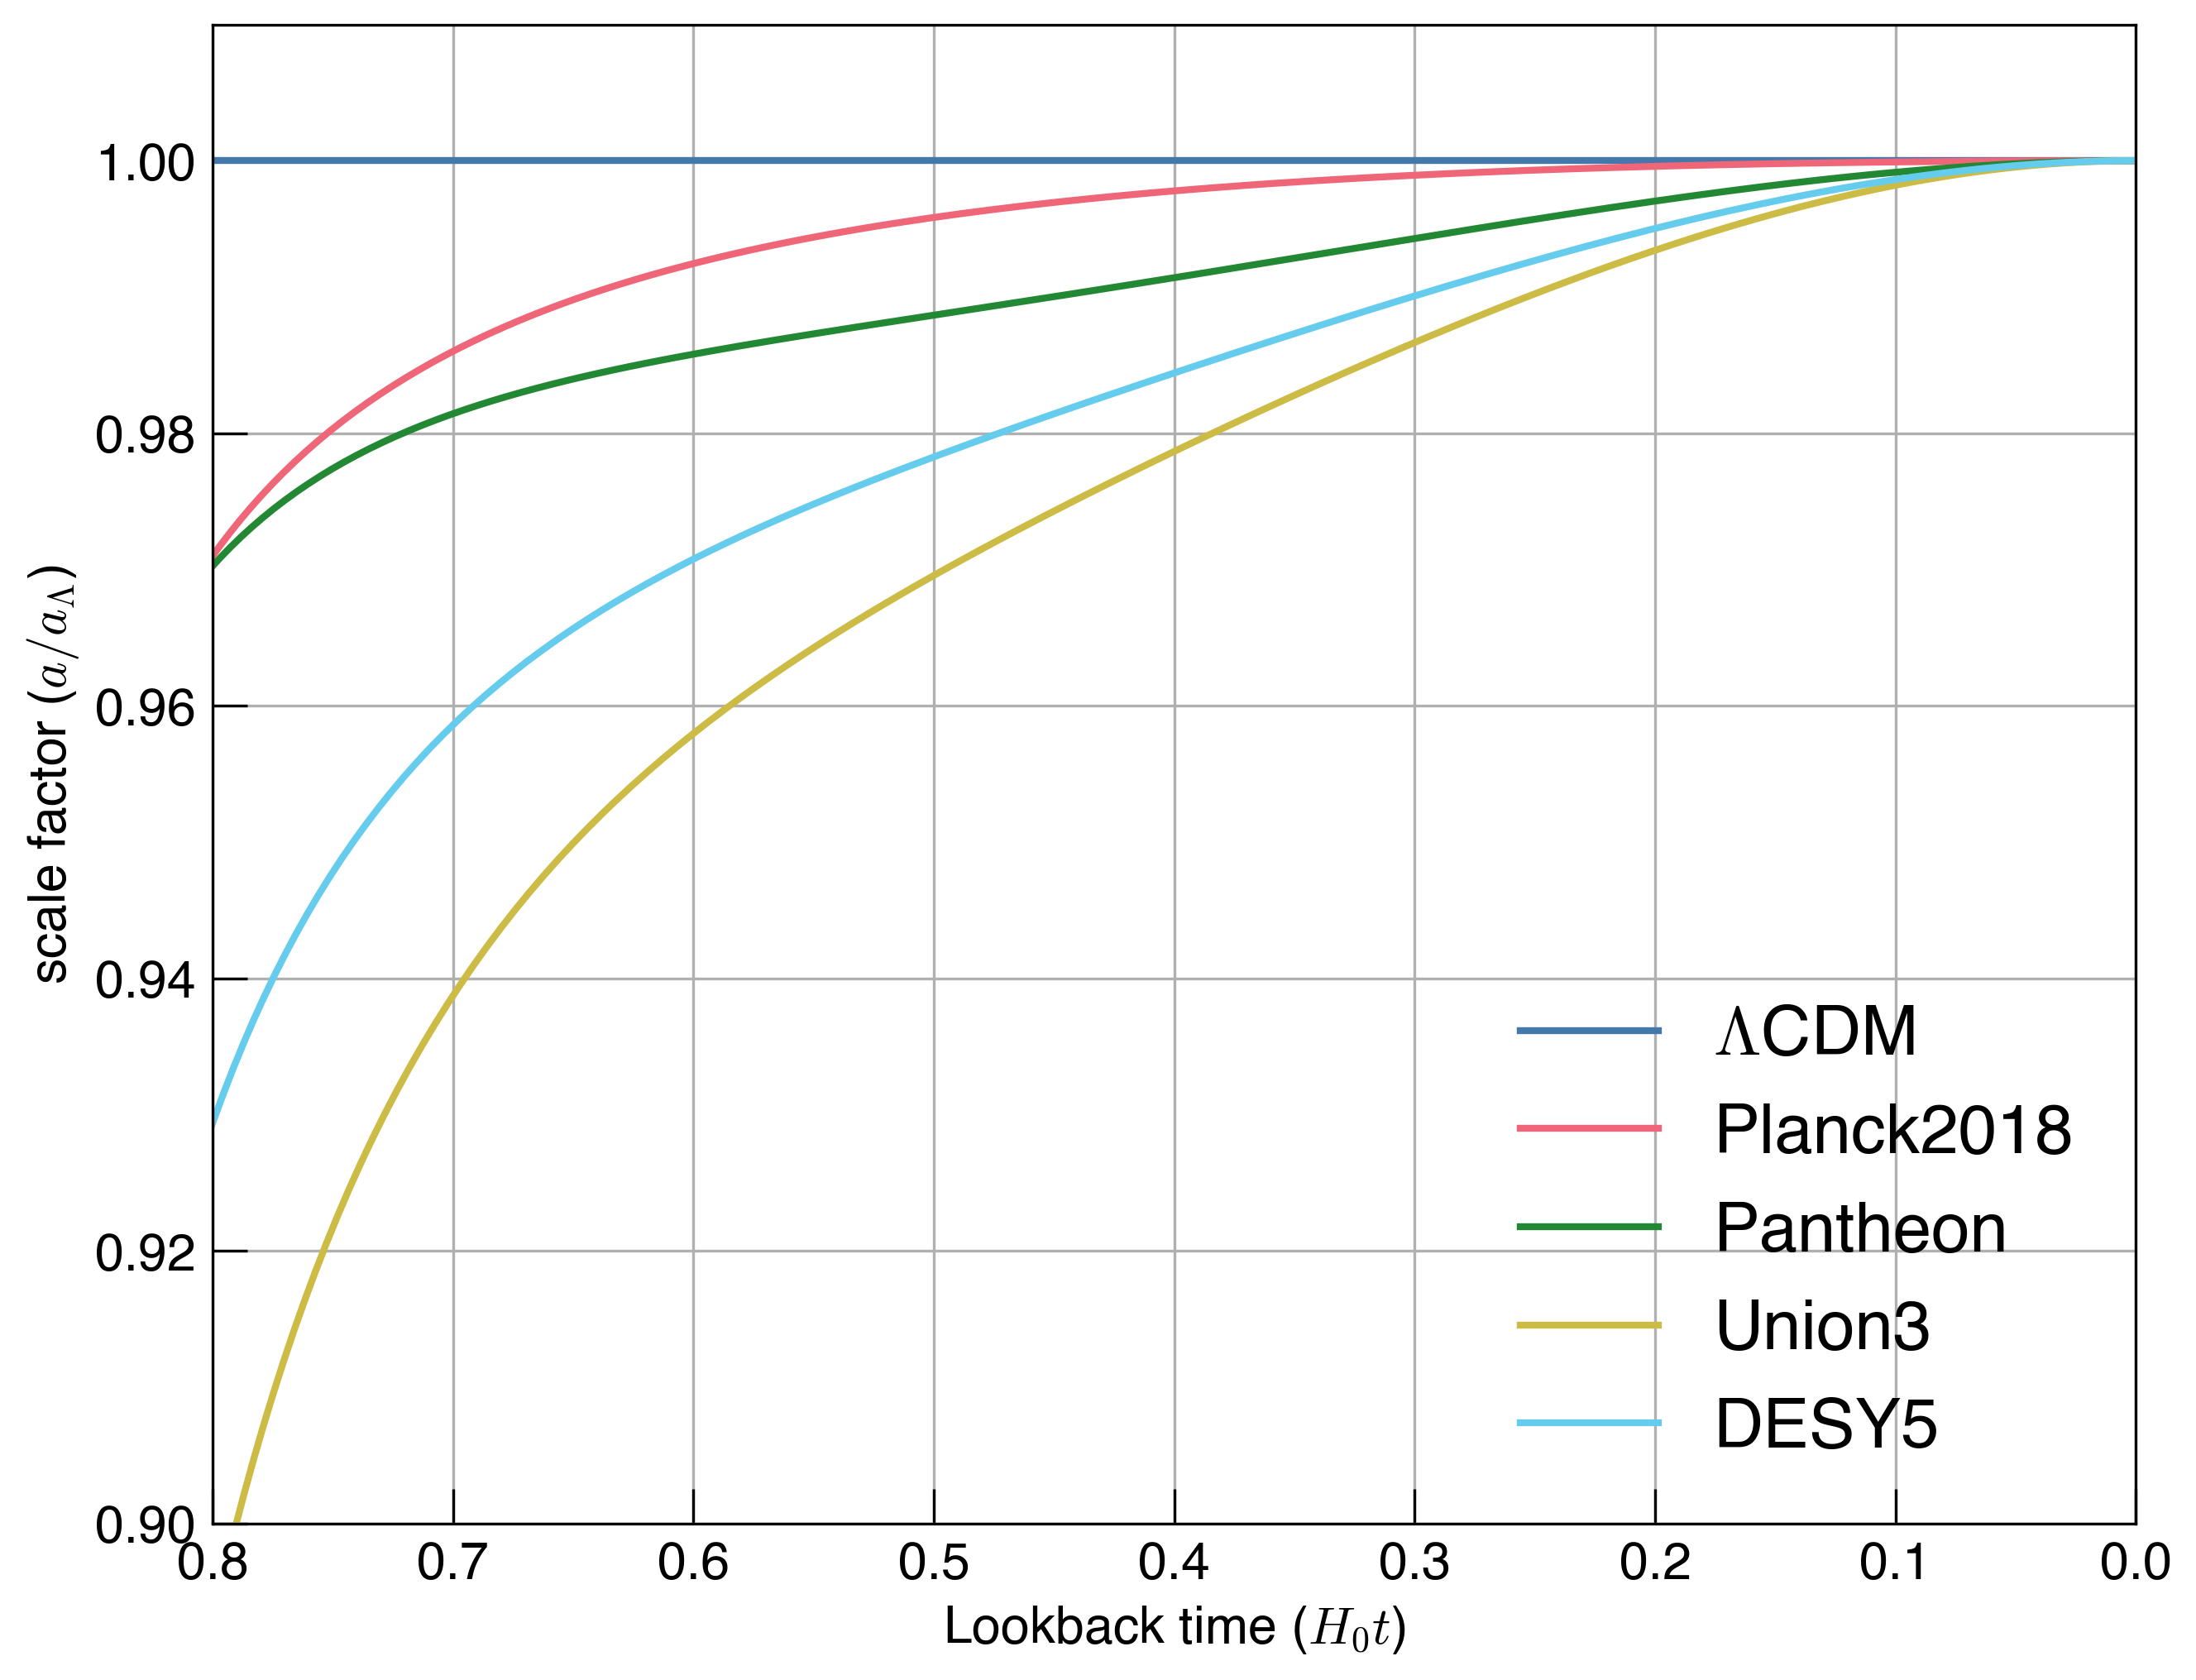

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(time_look_Concordance[1:], a_arr[1:]/scalefn_Concordance(time_look_Concordance[1:]), label=r'$\Lambda$CDM', lw=2)
ax.plot(time_look_Planck2018[1:], a_arr[1:]/scalefn_Concordance(time_look_Planck2018[1:]), label='Planck2018', lw=2)
ax.plot(time_look_Pantheon[1:], a_arr[1:]/scalefn_Concordance(time_look_Pantheon[1:]), label='Pantheon', lw=2)
ax.plot(time_look_Union3[1:], a_arr[1:]/scalefn_Concordance(time_look_Union3[1:]), label='Union3', lw=2)
ax.plot(time_look_DESY5[1:], a_arr[1:]/scalefn_Concordance(time_look_DESY5[1:]), label='DESY5', lw=2)


ax.set_xlabel(r"Lookback time ($H_0 t$)")
ax.set_ylabel("scale factor ($a / a_{\Lambda}$)")

# ax.set_xlim(1.0,0.)
ax.set_xlim(0.8,0.)
ax.set_ylim(0.90, 1.01)

ax.grid()


plt.legend()

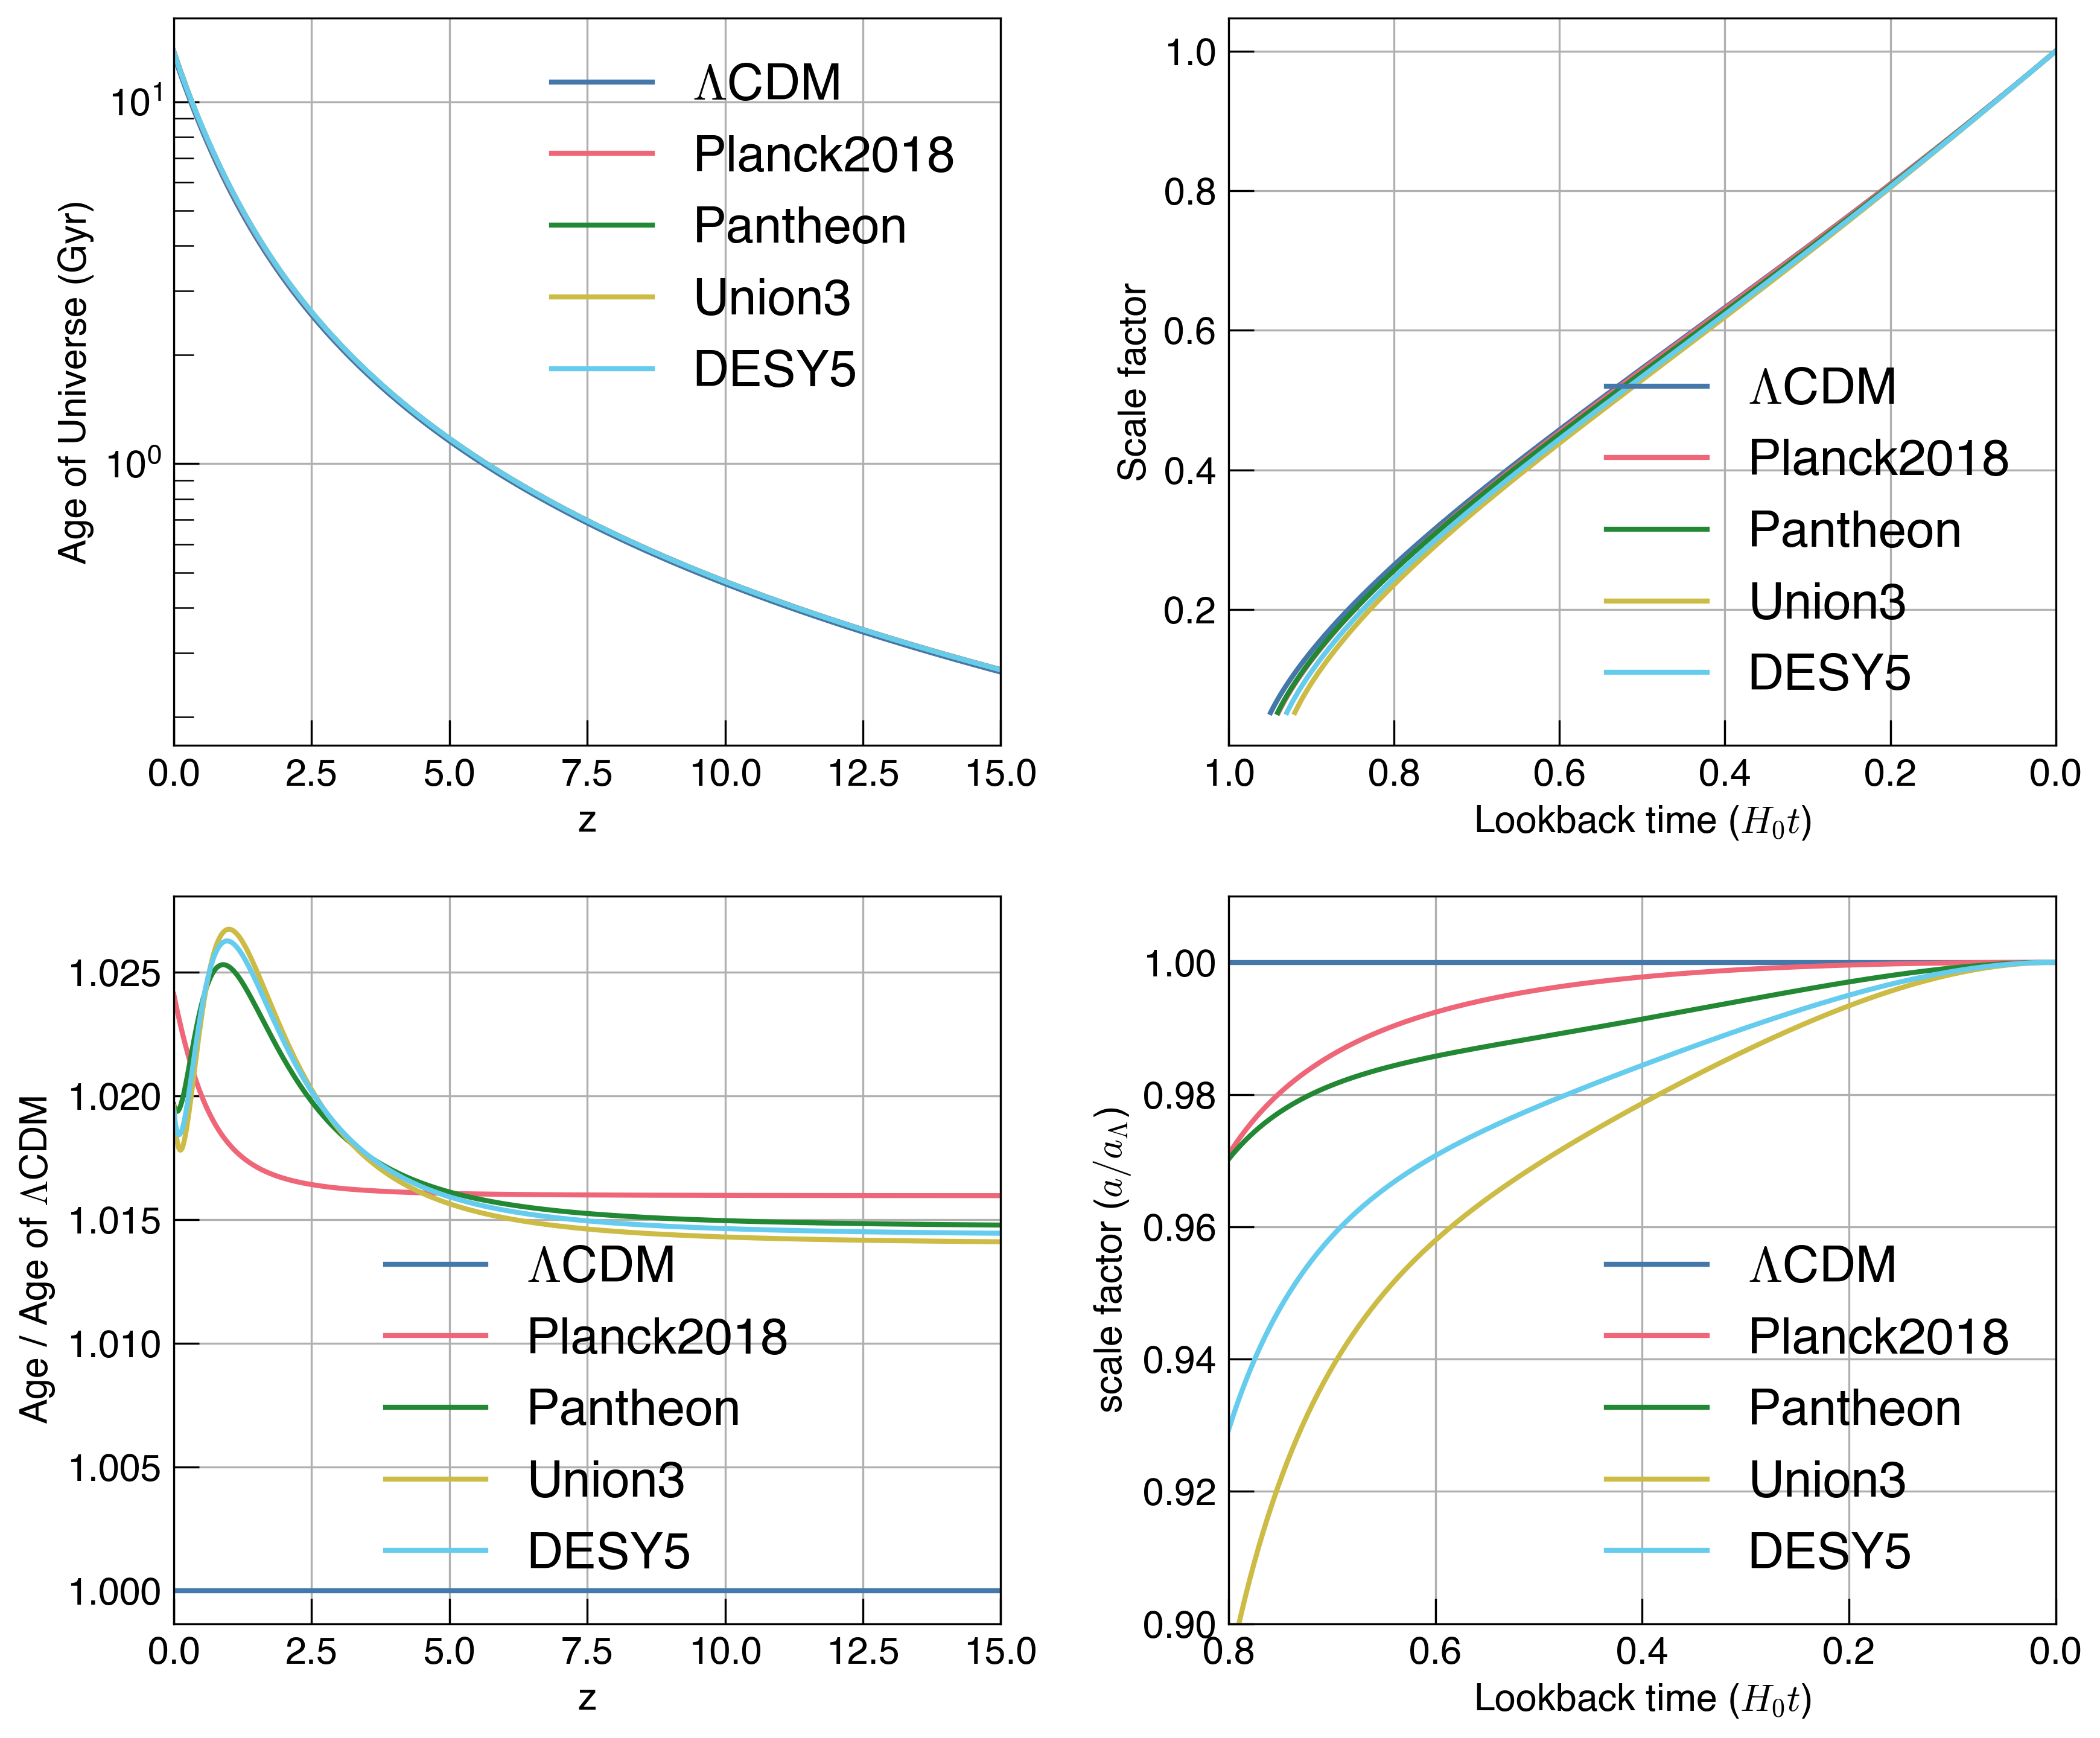

In [20]:
fig, ax = plt.subplots(figsize=(12,10), nrows=2, ncols=2)

ax[0,0].plot(z_arr, time_ageGyr_Concordance, label=r'$\Lambda$CDM', lw=2)
ax[0,0].plot(z_arr, time_ageGyr_Planck2018, label='Planck2018', lw=2)
ax[0,0].plot(z_arr, time_ageGyr_Pantheon, label='Pantheon', lw=2)
ax[0,0].plot(z_arr, time_ageGyr_Union3, label='Union3', lw=2)
ax[0,0].plot(z_arr, time_ageGyr_DESY5, label='DESY5', lw=2)

ax[0,0].set_xlim(0.,15.)

ax[0,0].set_xlabel("z")
ax[0,0].set_yscale('log')
ax[0,0].set_ylabel("Age of Universe (Gyr)")

ax[0,0].legend()
ax[0,0].grid()


##
ax[1,0].plot(z_arr, time_ageGyr_Concordance/agefn_Concordance(z_arr), label=r'$\Lambda$CDM', lw=2)
ax[1,0].plot(z_arr, time_ageGyr_Planck2018/agefn_Concordance(z_arr), label='Planck2018', lw=2)
ax[1,0].plot(z_arr, time_ageGyr_Pantheon/agefn_Concordance(z_arr), label='Pantheon', lw=2)
ax[1,0].plot(z_arr, time_ageGyr_Union3/agefn_Concordance(z_arr), label='Union3', lw=2)
ax[1,0].plot(z_arr, time_ageGyr_DESY5/agefn_Concordance(z_arr), label='DESY5', lw=2)

ax[1,0].set_xlim(0.,15.)

ax[1,0].set_xlabel("z")
# ax[1,0].set_yscale('log')
ax[1,0].set_ylabel("Age / Age of $\Lambda$CDM")

ax[1,0].legend()
ax[1,0].grid()
##


ax[0,1].plot(time_look_Concordance, a_arr, label=r'$\Lambda$CDM', lw=2)
ax[0,1].plot(time_look_Planck2018, a_arr, label='Planck2018', lw=2)
ax[0,1].plot(time_look_Pantheon, a_arr, label='Pantheon', lw=2)
ax[0,1].plot(time_look_Union3, a_arr, label='Union3', lw=2)
ax[0,1].plot(time_look_DESY5, a_arr, label='DESY5', lw=2)

ax[0,1].set_xlabel(r"Lookback time ($H_0 t$)")
ax[0,1].set_ylabel("Scale factor")
ax[0,1].set_xlim(1.0,0.)

ax[0,1].legend()
ax[0,1].grid()


ax[1,1].plot(time_look_Concordance[1:], a_arr[1:]/scalefn_Concordance(time_look_Concordance[1:]), label=r'$\Lambda$CDM', lw=2)
ax[1,1].plot(time_look_Planck2018[1:], a_arr[1:]/scalefn_Concordance(time_look_Planck2018[1:]), label='Planck2018', lw=2)
ax[1,1].plot(time_look_Pantheon[1:], a_arr[1:]/scalefn_Concordance(time_look_Pantheon[1:]), label='Pantheon', lw=2)
ax[1,1].plot(time_look_Union3[1:], a_arr[1:]/scalefn_Concordance(time_look_Union3[1:]), label='Union3', lw=2)
ax[1,1].plot(time_look_DESY5[1:], a_arr[1:]/scalefn_Concordance(time_look_DESY5[1:]), label='DESY5', lw=2)

ax[1,1].set_xlabel(r"Lookback time ($H_0 t$)")
ax[1,1].set_ylabel("scale factor ($a / a_{\Lambda}$)")

ax[1,1].set_xlim(0.8,0.)
ax[1,1].set_ylim(0.90, 1.01)

ax[1,1].legend()
ax[1,1].grid()

plt.tight_layout()

plt.savefig('expansion_history.png', dpi=256)

In [14]:
z_sample = np.array([2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])
ageme_Concordance = np.zeros_like(z_sample)
ageme_Planck2018 = np.zeros_like(z_sample)
ageme_Union3 = np.zeros_like(z_sample)
ageme_Pantheon = np.zeros_like(z_sample)
ageme_DESY5 = np.zeros_like(z_sample)

for k, z in enumerate(z_sample):
    ageme_Concordance[k] = agefn_Concordance(z)
    ageme_Planck2018[k] = agefn_Planck2018(z)
    ageme_Union3[k] = agefn_Union3(z)
    ageme_Pantheon[k] = agefn_Pantheon(z)
    ageme_DESY5[k] = agefn_DESY5(z)

In [15]:
##
H0=70.0
OmegaM=0.3
OmegaK=0.0
OmegaR=0.0
w0=-1.0
wa=0.0
##

ageBrant_Concordance = np.array([
    3.226623323356595, 
    1.5159998476316208, 
    0.9169758858682027, 
    0.6293626696041432, 
    0.46588669861742815, 
    0.3626638570968197, 
    0.29262352034346684, 
    0.24254280510970183
])


##
H0=67.66
OmegaM=0.3111
OmegaR=0.00
OmegaK=0.0
w0=-1.0
wa=0.0
##

ageBrant_Planck2018 = np.array([
    3.2803891167717065, 
    1.540436462973446,
    0.9316645269724653, 
    0.6394247312291004, 
    0.47332935485470884,
    0.3684553440837668,
    0.2972955773085637,
    0.24641481558826328
])


##
H0=66.53
OmegaM=0.3230
OmegaR=0.0
OmegaK=0.
w0=-0.650
wa=-1.270
##

ageBrant_Union3 = np.array([
    3.299055968557603,
    1.5412602378404667,
    0.9307932784687409,
    0.6385029781193552,
    0.4725457470277554,
    0.36780679151501694,
    0.2967553597871859,
    0.2459587992864467
])



##
H0=68.03
OmegaM=0.3085
OmegaR=0.00
OmegaK=0.
w0=-0.827
wa=-0.750
##

ageBrant_Pantheon = np.array([
    3.295901745209063,
    1.541700199527945,
    0.9313116847391765,
    0.6389039592746872,
    0.4728535999864363,
    0.3680498027950865,
    0.29695265091230283,
    0.24612281963234572
])


##
H0=67.24
OmegaM=0.3160
OmegaR=0.0
OmegaK=0.0
w0=-0.727
wa=-1.050
##

ageBrant_DESY5 = np.array([
    3.298184826966848,
    1.5415841235629824,
    0.9310770865918485,
    0.6387122881648946,
    0.47270399445980615,
    0.3679309265816819,
    0.2968558443851279,
    0.24604221203396293
])

In [16]:
##
H0=70.0
OmegaM=0.3
OmegaK=0.0
OmegaR=0.0
w0=-1.0
wa=0.0
##

ageWright_Concordance = np.array([
    3.227,
    1.516,
    0.917,
    0.629,
    0.466,
    0.363,
    0.293,
    0.243
])


##
H0=67.66
OmegaM=0.3111
OmegaR=0.00
OmegaK=0.0
w0=-1.0
wa=0.0
##

ageWright_Planck2018 = np.array([
    3.280,
    1.540,
    0.932,
    0.639,
    0.473,
    0.368,
    0.297,
    0.246
])


##
H0=66.53
OmegaM=0.3230
OmegaR=0.0
OmegaK=0.
w0=-0.650
wa=-1.270
##

ageWright_Union3 = np.array([
    3.299,
    1.541,
    0.931,
    0.639,
    0.473,
    0.368,
    0.297,
    0.246
])



##
H0=68.03
OmegaM=0.3085
OmegaR=0.00
OmegaK=0.
w0=-0.827
wa=-0.750
##

ageWright_Pantheon = np.array([
    3.296,
    1.542,
    0.931,
    0.639,
    0.473,
    0.368,
    0.297,
    0.246
])


##
H0=67.24
OmegaM=0.3160
OmegaR=0.0
OmegaK=0.0
w0=-0.727
wa=-1.050
##

ageWright_DESY5 = np.array([
    3.298,
    1.542,
    0.931,
    0.639,
    0.473,
    0.368,
    0.297,
    0.246
])

In [17]:
agearr_Concordance = np.zeros((len(z_sample), 4))
agearr_Planck2018 = np.zeros((len(z_sample), 4))
agearr_Pantheon = np.zeros((len(z_sample), 4))
agearr_Union3 = np.zeros((len(z_sample), 4))
agearr_DESY5 = np.zeros((len(z_sample), 4))

for k, z in enumerate(z_sample):
    agearr_Concordance[k,0] = z
    agearr_Concordance[k,1] = ageBrant_Concordance[k]
    agearr_Concordance[k,2] = ageWright_Concordance[k]
    agearr_Concordance[k,3] = ageme_Concordance[k]
    
    
    agearr_Planck2018[k,0] = z
    agearr_Planck2018[k,1] = ageBrant_Planck2018[k]
    agearr_Planck2018[k,2] = ageWright_Planck2018[k]
    agearr_Planck2018[k,3] = ageme_Planck2018[k]
    
    
    agearr_Pantheon[k,0] = z
    agearr_Pantheon[k,1] = ageBrant_Pantheon[k]
    agearr_Pantheon[k,2] = ageWright_Pantheon[k]
    agearr_Pantheon[k,3] = ageme_Pantheon[k]
    
    
    agearr_Union3[k,0] = z
    agearr_Union3[k,1] = ageBrant_Union3[k]
    agearr_Union3[k,2] = ageWright_Union3[k]
    agearr_Union3[k,3] = ageme_Union3[k]
    
    
    agearr_DESY5[k,0] = z
    agearr_DESY5[k,1] = ageBrant_DESY5[k]
    agearr_DESY5[k,2] = ageWright_DESY5[k]
    agearr_DESY5[k,3] = ageme_DESY5[k]

In [21]:
agecmp_header = "z - redshift, Age (Brant exp history), Age (Ned Wright cosmo calc), Age (Diego flat cosmo calc)"

Concordance_fname = "age_comp/age_comparison_Concordance.txt"
np.savetxt(Concordance_fname, agearr_Concordance, header=agecmp_header, delimiter=', ')

Planck2018_fname = "age_comp/age_comparison_Planck2018.txt"
np.savetxt(Planck2018_fname, agearr_Planck2018, header=agecmp_header, delimiter=', ')

Pantheon_fname = "age_comp/age_comparison_Pantheon.txt"
np.savetxt(Pantheon_fname, agearr_Pantheon, header=agecmp_header, delimiter=', ')

Union3_fname = "age_comp/age_comparison_Union3.txt"
np.savetxt(Union3_fname, agearr_Union3, header=agecmp_header, delimiter=', ')

DESY5_fname = "age_comp/age_comparison_DESY5.txt"
np.savetxt(DESY5_fname, agearr_DESY5, header=agecmp_header, delimiter=', ')

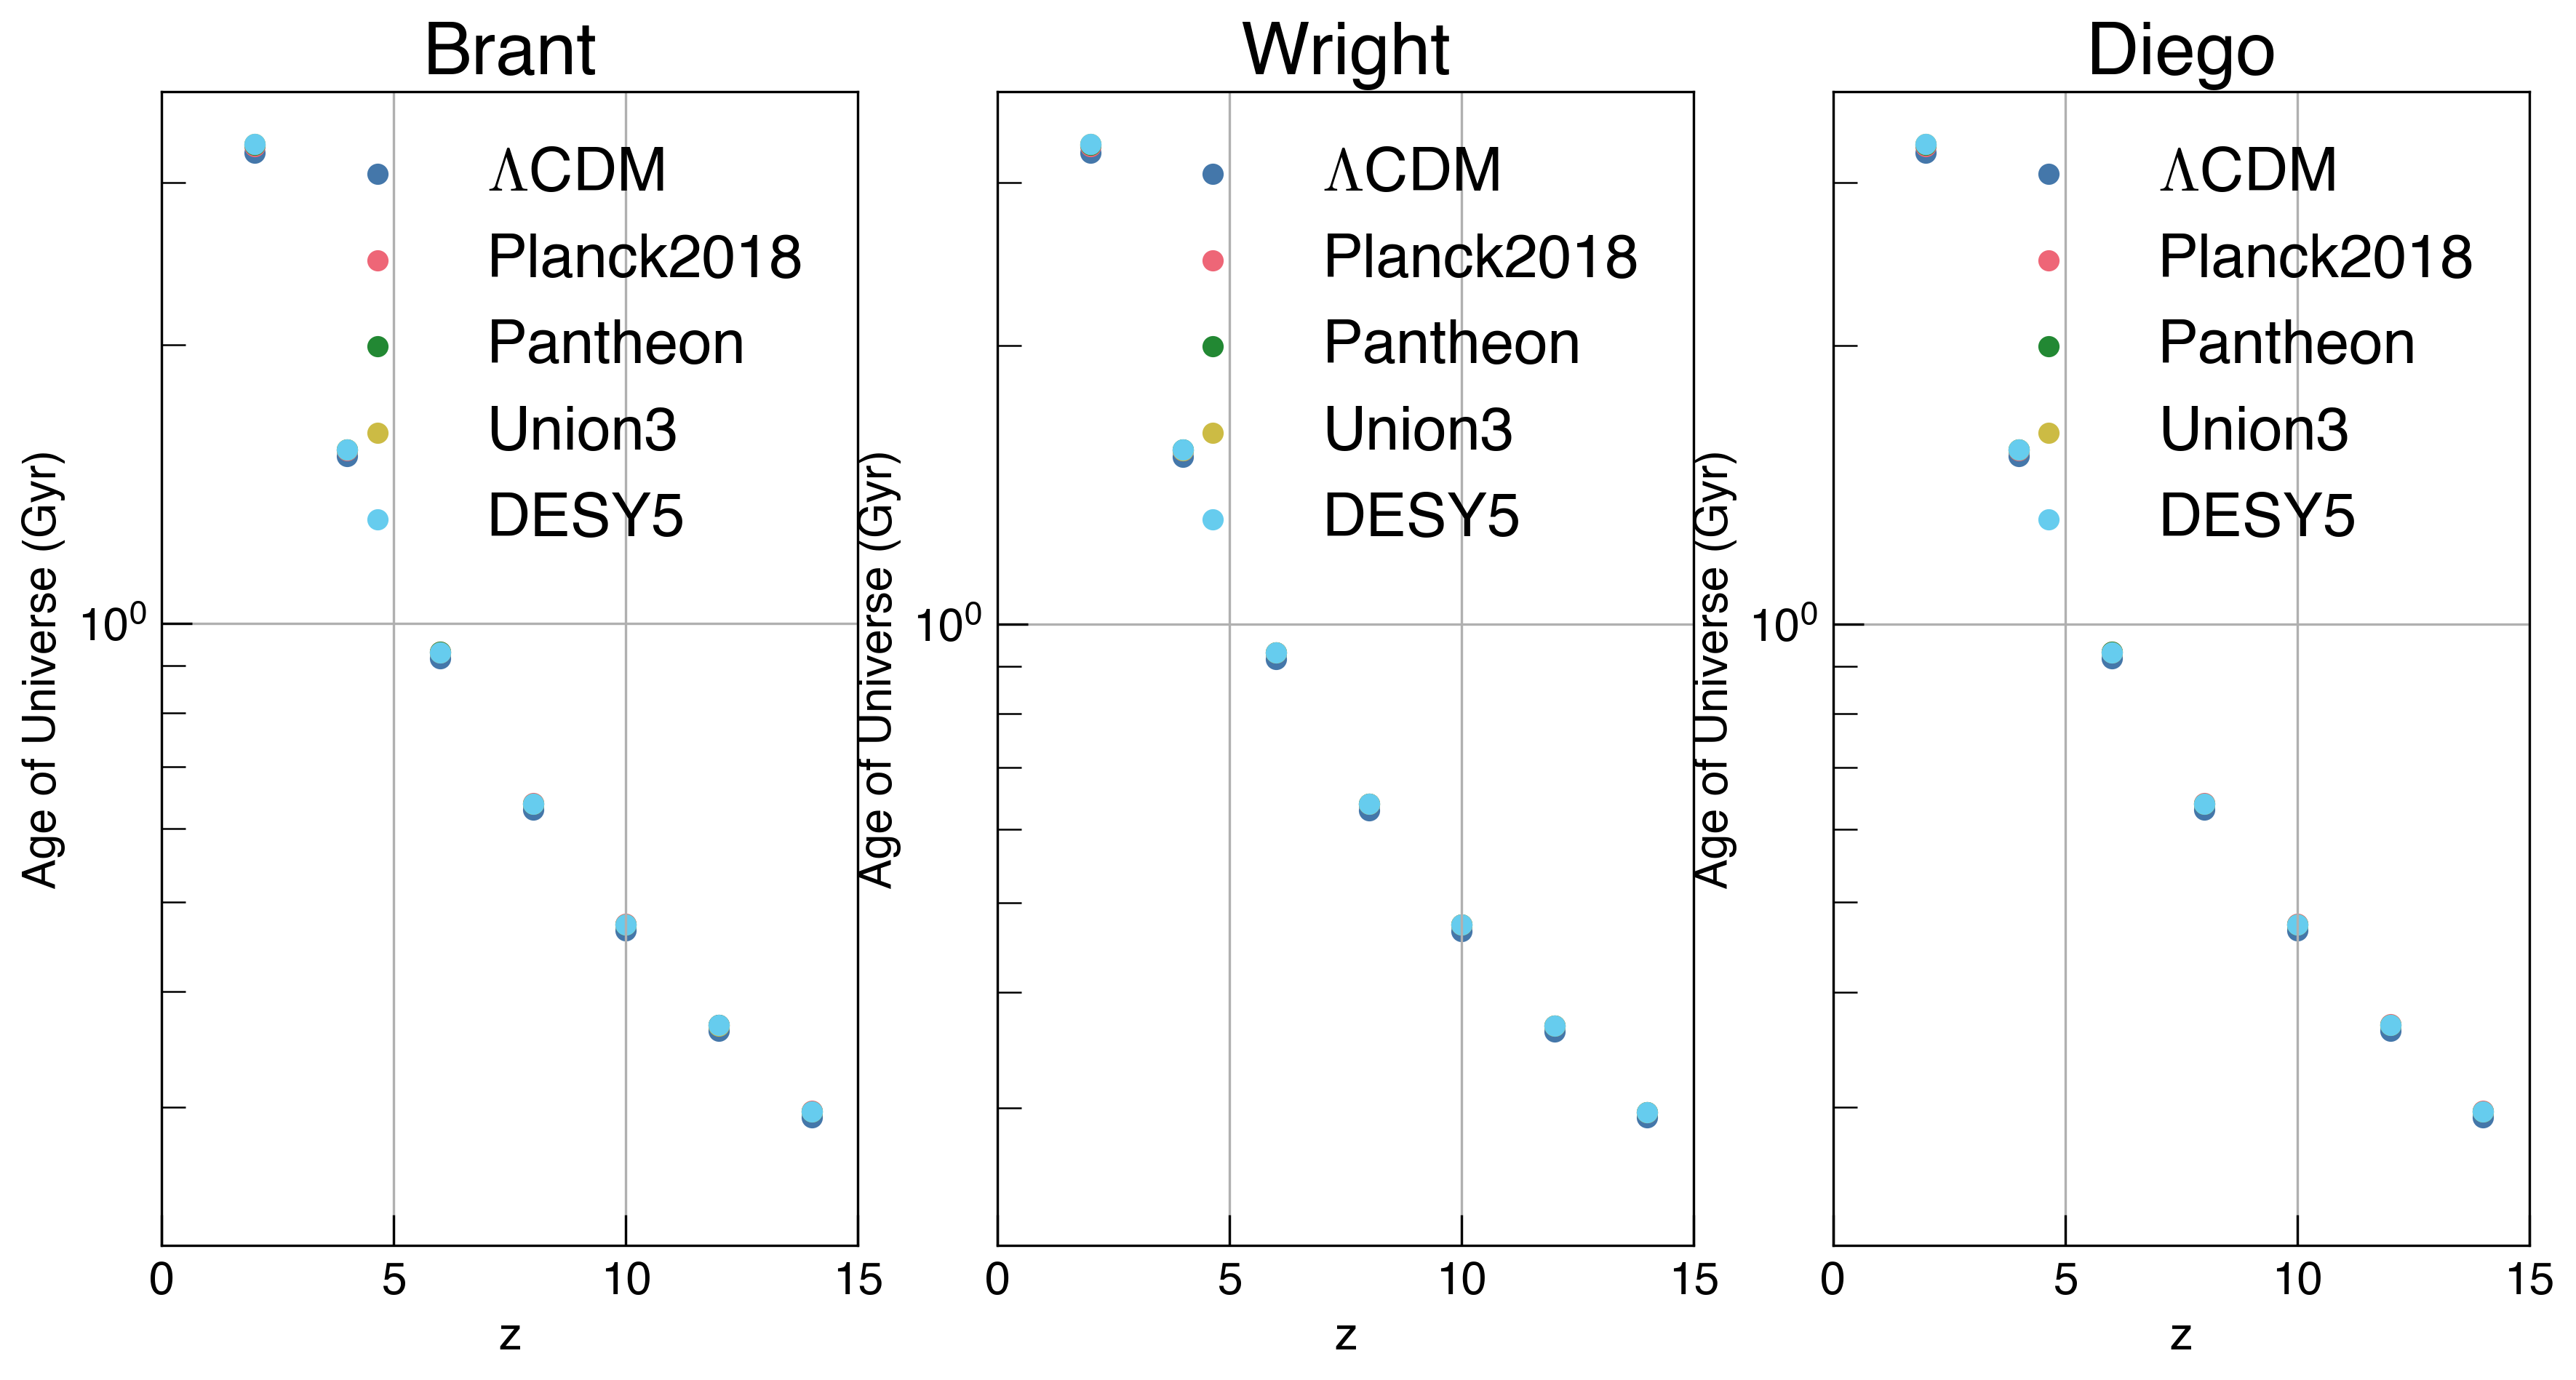

In [19]:
fig, ax = plt.subplots(figsize=(14,7), nrows=1, ncols=3)

ax[0].scatter(z_sample, agearr_Concordance[:,1], label=r'$\Lambda$CDM')
ax[0].scatter(z_sample, agearr_Planck2018[:,1], label='Planck2018')
ax[0].scatter(z_sample, agearr_Pantheon[:,1], label='Pantheon')
ax[0].scatter(z_sample, agearr_Union3[:,1], label='Union3')
ax[0].scatter(z_sample, agearr_DESY5[:,1], label='DESY5')

ax[0].set_xlim(0.,15.)

ax[0].set_xlabel("z")
ax[0].set_yscale('log')
ax[0].set_ylabel("Age of Universe (Gyr)")
ax[0].set_title("Brant")

ax[0].legend()
ax[0].grid()

##
ax[1].scatter(z_sample, agearr_Concordance[:,2], label=r'$\Lambda$CDM')
ax[1].scatter(z_sample, agearr_Planck2018[:,2], label='Planck2018')
ax[1].scatter(z_sample, agearr_Pantheon[:,2], label='Pantheon')
ax[1].scatter(z_sample, agearr_Union3[:,2], label='Union3')
ax[1].scatter(z_sample, agearr_DESY5[:,2], label='DESY5')

ax[1].set_xlim(0.,15.)

ax[1].set_xlabel("z")
ax[1].set_yscale('log')
ax[1].set_ylabel("Age of Universe (Gyr)")
ax[1].set_title("Wright")

ax[1].legend()
ax[1].grid()

##
ax[2].scatter(z_sample, agearr_Concordance[:,3], label=r'$\Lambda$CDM')
ax[2].scatter(z_sample, agearr_Planck2018[:,3], label='Planck2018')
ax[2].scatter(z_sample, agearr_Pantheon[:,3], label='Pantheon')
ax[2].scatter(z_sample, agearr_Union3[:,3], label='Union3')
ax[2].scatter(z_sample, agearr_DESY5[:,3], label='DESY5')

ax[2].set_xlim(0.,15.)

ax[2].set_xlabel("z")
ax[2].set_yscale('log')
ax[2].set_ylabel("Age of Universe (Gyr)")
ax[2].set_title("Diego")

ax[2].legend()
ax[2].grid()